In [2]:
from multiprocessing import Pool
import cv2,re
import os, gc
import sys,time
import numpy as np
import shutil
from glob import glob
import json

In [4]:
def image_files_in_folder(folder):
    return [os.path.join(folder, f) for f in os.listdir(folder) if re.match(r'.*\.(jpg|png)', f, flags=re.I)]

In [9]:
new_dir='/home/shridhar/Shree/shwet/Brain_tumor/brats2013_tumor-notumor (2)/flair'

In [5]:
file_list=image_files_in_folder(new_dir)

In [6]:
len(file_list)

2125

In [ ]:
# we split data into two directories one that having the tumer and one 
# that not having tumor so that we can process data faster

In [10]:
for i in range(len(file_list)):
    classes = re.findall(r'-(\w*).png$',file_list[i])[0]
    print(classes)
    move_dir=new_dir+'/'+classes
    if not os.path.exists(move_dir):
        os.mkdir(move_dir)
    file=file_list[i]
    shutil.move(file,move_dir)

False
True
True
False
True
False
True
False
True
True
False
True
True
True
True
False
True
False
False
True
True
False
True
True
False
True
False
False
True
True
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
False
False
True
False
True
True
True
True
True
True
True
True
False
True
True
True
True
True
False
True
True
True
True
False
True
True
True
False
False
False
False
False
True
False
True
False
True
False
True
False
True
True
False
True
True
False
True
True
True
True
False
True
True
True
False
True
False
True
False
True
True
False
False
True
True
True
True
True
True
True
True
True
False
True
False
True
True
True
True
True
False
False
True
True
True
True
True
False
True
True
True
False
False
True
True
True
True
True
False
False
False
True
True
True
True
True
True
True
False
T

True
True
False
True
False
False
False
True
True
False
False
True
True
False
True
True
True
True
True
True
True
True
False
True
False
True
True
False
False
True
False
False
False
True
True
True
False
False
True
True
True
True
True
False
True
True
False
False
True
True
True
False
True
False
True
True
True
False
True
True
True
True
True
False
False
False
True
False
True
True
False
True
False
False
False
True
True
True
True
False
True
True
True
False
False
True
True
False
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
False
False
True
False
True
True
False
True
True
True
True
False
True
False
True
False
False
True
True
False
True
True
True
True
True
False
True
True
True
True
False
True
False
False
True
True
False
False
True
True
True
True
True
True
False
True
True
True
False
True
True
False
False
True
True
False
False
False
True
False
True
True
True
False
False
False
True
False
False
True
True
True
False
True
False
True
True
True
False
Tr

In [ ]:
re.findall(r'-(\w*).png$',file_list[0])[0]

In [ ]:
new_dir

In [ ]:
# importing data and model Developing

In [11]:
import cv2
from glob import glob
import os,re

In [12]:
file_list=image_files_in_folder('/home/shridhar/Shree/shwet/Brain_tumor/brats2013_tumor-notumor/train/flair/True')

In [13]:
len(file_list)

1421

In [6]:
data_T=[]
label_T=[]
for i in file_list:
    image=cv2.imread(i)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    data_T.append(image)
    label_T.append(1)

In [7]:
len(data_T)

1421

In [8]:
file_list_1=image_files_in_folder('/home/shridhar/Shree/shwet/Brain_tumor/brats2013_tumor-notumor/train/flair/False')

In [9]:
data_NT=[]
label_NT=[]
for i in file_list_1:
    image=cv2.imread(i)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    data_NT.append(image)
    label_NT.append(0)

In [10]:
print(len(data_T))
print(len(data_NT))

1421
704


In [16]:
image_data=[]
for j in data_T:
    image_data.append(j)
for i in data_NT:
    image_data.append(i)

In [17]:
class_data=[]
for i in label_T:
    class_data.append(i)
for j in label_NT:
    class_data.append(j)

In [18]:
print(len(class_data))
print(len(image_data))

2125
2125


In [19]:
import numpy as np
image_data=np.array(image_data)
class_data=np.array(class_data)

In [20]:
import random

In [21]:
lis=list(range(0,2125))

In [22]:
random=random.sample(lis,1488)
train_data=image_data[random]
train_label=class_data[random]

In [23]:
test_r=[]
for i in range(2125):
    if i not in random:
        test_r.append(i)

In [25]:
test_data=image_data[test_r]
test_label=class_data[test_r]

In [27]:
len(test_label)

637

In [28]:
train_data=train_data.astype('float32')
test_data=test_data.astype('float32')

In [29]:
from keras.utils import to_categorical

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [30]:
train_data.shape

(1488, 256, 128)

In [31]:
train_data_1=train_data

In [33]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_data.shape[1:])
train_data = train_data.reshape(train_data.shape[0], dimData)
test_data = test_data.reshape(test_data.shape[0], dimData)

In [34]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [35]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_label)
test_labels_one_hot = to_categorical(test_label)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_label[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  1
After conversion to categorical ( one-hot ) :  [0. 1.]


In [36]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [37]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, shuffle=True,
                   validation_data=(test_data, test_labels_one_hot))

Train on 1488 samples, validate on 637 samples
Epoch 1/20
1488/1488 [==============================] - 2s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 2/20
1488/1488 [==============================] - 2s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 3/20
1488/1488 [==============================] - 2s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 4/20
1488/1488 [==============================] - 2s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 5/20
1488/1488 [==============================] - 2s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 6/20
1488/1488 [==============================] - 2s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 7/20
1488/1488 [==============================] - 2s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 8/20
1488

In [41]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

637/637 [==============================] - 0s 640us/step
Evaluation result on Test Data : Loss = 5.465476732239057, accuracy = 0.6609105180533752


In [42]:
import matplotlib.pyplot as plt

Text(0.5,1,'Accuracy Curves')

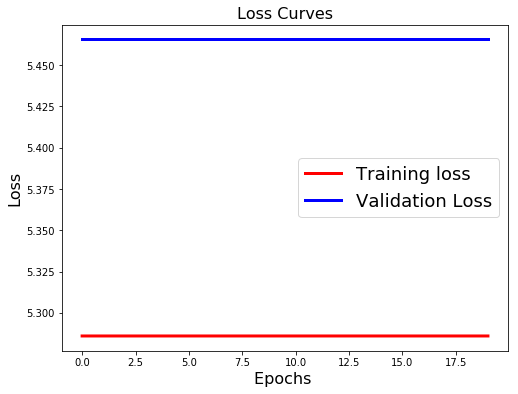

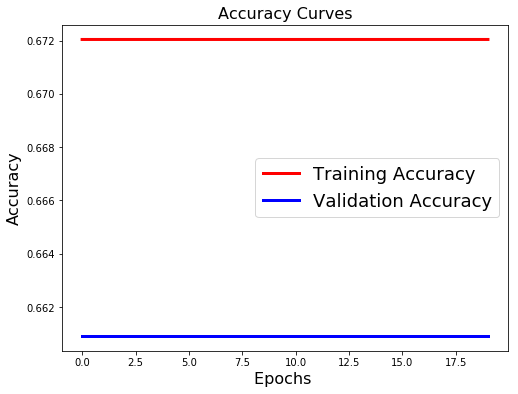

In [43]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [44]:
nClasses=2

In [ ]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

In [ ]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Train on 1488 samples, validate on 637 samples
Epoch 1/20
1488/1488 [==============================] - 3s 2ms/step - loss: 4.4484 - acc: 0.6539 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 2/20
1488/1488 [==============================] - 2s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 3/20
1488/1488 [==============================] - 3s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 4/20
1488/1488 [==============================] - 3s 2ms/step - loss: 5.2860 - acc: 0.6720 - val_loss: 5.4655 - val_acc: 0.6609
Epoch 5/20
1024/1488 [===================>..........] - ETA: 0s - loss: 5.0684 - acc: 0.6855

In [ ]:
# Predict the most likely class
model_reg.predict_classes(test_data[[0],:])

In [ ]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

# CNN implementation for brain tumor detection

In [13]:
file_list=image_files_in_folder('/home/shridhar/Shree/shwet/Brain_tumor/brats2013_tumor-notumor/train/flair/True')
file_list_1=image_files_in_folder('/home/shridhar/Shree/shwet/Brain_tumor/brats2013_tumor-notumor/train/flair/False')

In [14]:
###CNN implementation for image classifiaction
from PIL import Image

In [15]:
data_T=[]
label_T=[]
for i in file_list:
    im=Image.open(i)
    gray = im.convert('L')
    data_T.append(np.array(gray).flatten())
    label_T.append(1)

In [16]:
data_NT=[]
label_NT=[]
for i in file_list_1:
    im=Image.open(i)
    gray = im.convert('L')
    data_NT.append(np.array(gray).flatten())
    label_NT.append(1)

In [17]:
print(len(data_T))
print(len(label_T))
for j in range(len(data_NT)):
    data_T.append(data_NT[j])
    label_T.append(label_NT[j])
print(len(data_T))
print(len(label_T))

1421
1421
2125
2125


In [18]:
immatrix=data_T
imlabel=label_T
immatrix = np.asarray(immatrix)
imlabel = np.asarray(imlabel)

In [19]:
print(immatrix.shape)
print(imlabel.shape)

(2125, 32768)
(2125,)


In [20]:
from sklearn.utils import shuffle

data,Label = shuffle(immatrix, imlabel, random_state=2)
train_data = [data,Label]
type(train_data)

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


list

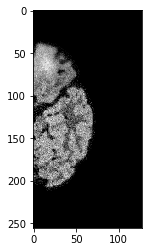

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
img_rows, img_cols = 256,128 

img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')

In [22]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 2
# number of epochs to train
nb_epoch = 10

In [23]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [24]:
(X, y) = (train_data[0],train_data[1])
from sklearn.cross_validation import train_test_split

# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print(X_train.shape)
print(X_test.shape)

#X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(1487, 32768)
(638, 32768)
X_train shape: (1487, 128, 256, 1)
1487 train samples
638 test samples


/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


label :  [0. 1.]


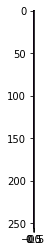

In [25]:
from keras.utils import np_utils

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [26]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy'])#KERAS

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 256,..., padding="valid")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [27]:
from keras.preprocessing.image import ImageDataGenerator

# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=8
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)

In [28]:
#Fit the training model
model.fit_generator(train_generator, steps_per_epoch=10, epochs=3, validation_data=validation_generator, validation_steps=int(len(X_test)/batchsize))

Epoch 1/3
10/10 [==============================] - 23s 2s/step - loss: 0.0742 - acc: 0.9250 - val_loss: 3.9177e-06 - val_acc: 1.0000
Epoch 2/3
10/10 [==============================] - 22s 2s/step - loss: 2.4611e-05 - acc: 1.0000 - val_loss: 3.2460e-06 - val_acc: 1.0000
Epoch 3/3
10/10 [==============================] - 23s 2s/step - loss: 4.8693e-05 - acc: 1.0000 - val_loss: 2.2817e-06 - val_acc: 1.0000


In [60]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[1.20330380048124e-07, 1.0]


In [1]:
pwd

'/home/shridhar/Shree/shwet/Brain_tumor'